# Diabetes Classification

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
dfx=pd.read_csv('Diabetes_XTrain.csv')
dfy=pd.read_csv('Diabetes_YTrain.csv')
x=dfx.values
x=x[:,0:]
y=dfy.values
y=y[:,0:].reshape((-1,))


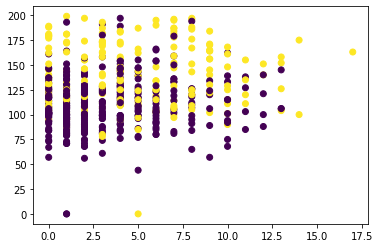

In [8]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [9]:
dft=pd.read_csv('Diabetes_Xtest.csv')
test=dft.values
test=test[:,0:]
print(test)

[[0.00e+00 1.80e+02 9.00e+01 ... 3.65e+01 3.14e-01 3.50e+01]
 [2.00e+00 9.30e+01 6.40e+01 ... 3.80e+01 6.74e-01 2.30e+01]
 [2.00e+00 1.14e+02 6.80e+01 ... 2.87e+01 9.20e-02 2.50e+01]
 ...
 [0.00e+00 1.62e+02 7.60e+01 ... 4.96e+01 3.64e-01 2.60e+01]
 [1.20e+01 8.40e+01 7.20e+01 ... 2.97e+01 2.97e-01 4.60e+01]
 [0.00e+00 9.40e+01 0.00e+00 ... 0.00e+00 2.56e-01 2.50e+01]]


In [10]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [11]:
def knn(x,y,query,k=5):
    vals=[]
    for i in range(x.shape[0]):
        d=distance(query,x[i])
        vals.append((d,y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred

In [12]:
pred=[]
for i in range(0,test.shape[0]):
    p=knn(x,y,test[i])
    pred.append(int(p))
print(pred)    


[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]


In [13]:
dia=0
non_dia=0
for i in pred:
    if i==1:
        dia=dia+1
    else:
        non_dia+=1
print(dia)
print(non_dia)

63
129


<BarContainer object of 2 artists>

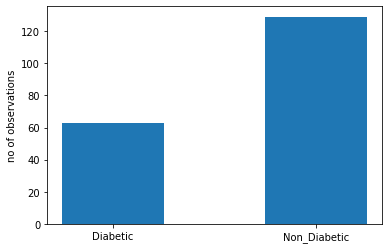

In [14]:
xpos=[0,1]
ypos=[dia,non_dia]
state=["Diabetic","Non_Diabetic"]
plt.xticks(xpos,state)
plt.ylabel("no of observations")
plt.bar(xpos,ypos,width=0.5)